<a href="https://colab.research.google.com/github/Jarin160/Student-Performance-Analysis/blob/main/exam_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [23]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [3]:
print("Shape of Dataset: ", data.shape)
print(data.info())
print("Total Null Values: \n", data.isna().sum())
print("Total Duplicate Values: ",data.duplicated().sum())

Shape of Dataset:  (6607, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence    

In [24]:
categorical_cols = data.select_dtypes(include='object').columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

print("Data types after handling missing values and encoding:")
print(data.info())

Data types after handling missing values and encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int64
 3   Access_to_Resources         6607 non-null   int64
 4   Extracurricular_Activities  6607 non-null   int64
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int64
 8   Internet_Access             6607 non-null   int64
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int64
 11  Teacher_Quality             6607 non-null   int64
 12  School_Type                 6607 non-null   int64
 13  Peer_Inf

/tmp/ipython-input-174329753.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [25]:
X = data.drop('Exam_Score', axis=1)
y = data['Exam_Score']

if 'X_train' not in locals():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Data split into training and testing sets.")

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info = pd.Series(mutual_info, name="Mutual Information", index=X_train.columns)
mutual_info = mutual_info.sort_values(ascending=False)

print("Mutual Information Scores (on training data):")
print(mutual_info)

k = 14
selector = SelectKBest(mutual_info_regression, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

print(f"\nSelected features (top {k}):")
selected_feature_names = X_train.columns[selector.get_support()]
print(selected_feature_names)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

print("\nScaled training features (first 5 rows):")
print(X_train_scaled[:5])

print("\nScaled testing features (first 5 rows):")
print(X_test_scaled[:5])

Mutual Information Scores (on training data):
Attendance                    0.302340
Hours_Studied                 0.158921
Previous_Scores               0.030300
Learning_Disabilities         0.022248
Access_to_Resources           0.019675
Parental_Involvement          0.019424
Teacher_Quality               0.017233
Parental_Education_Level      0.016062
Physical_Activity             0.015004
Extracurricular_Activities    0.013248
Internet_Access               0.012818
School_Type                   0.011825
Distance_from_Home            0.007739
Family_Income                 0.006255
Motivation_Level              0.002946
Tutoring_Sessions             0.001737
Gender                        0.000007
Sleep_Hours                   0.000000
Peer_Influence                0.000000
Name: Mutual Information, dtype: float64

Selected features (top 14):
Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
      

In [26]:
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return mae, mse, r2

# Linear Regression
lin_reg = LinearRegression()
lin_reg_mae, lin_reg_mse, lin_reg_r2 = train_and_evaluate_model(lin_reg, X_train_scaled, y_train, X_test_scaled, y_test)
print(f"Linear Regression MAE: {lin_reg_mae:.4f}, MSE: {lin_reg_mse:.4f}, R2: {lin_reg_r2:.4f}")

# Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)
rf_mae, rf_mse, rf_r2 = train_and_evaluate_model(rf_reg, X_train_scaled, y_train, X_test_scaled, y_test)
print(f"Random Forest Regressor MAE: {rf_mae:.4f}, MSE: {rf_mse:.4f}, R2: {rf_r2:.4f}")

# XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)
xgb_mae, xgb_mse, xgb_r2 = train_and_evaluate_model(xgb_reg, X_train_scaled, y_train, X_test_scaled, y_test)
print(f"XGBoost Regressor MAE: {xgb_mae:.4f}, MSE: {xgb_mse:.4f}, R2: {xgb_r2:.4f}")

Linear Regression MAE: 1.0316, MSE: 4.4495, R2: 0.6852
Random Forest Regressor MAE: 1.1647, MSE: 5.1184, R2: 0.6379
XGBoost Regressor MAE: 1.1587, MSE: 5.6195, R2: 0.6024


In [28]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("K-Fold Cross-Validation strategy configured:")
print(cv)

K-Fold Cross-Validation strategy configured:
KFold(n_splits=5, random_state=42, shuffle=True)


In [45]:
from sklearn.linear_model import Lasso

param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

lasso_reg = Lasso(random_state=42)

grid_search_lasso = GridSearchCV(lasso_reg, param_grid_lasso, cv=cv, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

print("Best parameters for Lasso Regressor:", grid_search_lasso.best_params_)

tuned_lasso_reg = Lasso(**grid_search_lasso.best_params_, random_state=42)
tuned_lasso_mae, tuned_lasso_mse, tuned_lasso_r2 = train_and_evaluate_model(tuned_lasso_reg, X_test_scaled, y_test, X_test_scaled, y_test)
print(f"Tuned Lasso Regressor MAE: {tuned_lasso_mae:.4f}, MSE: {tuned_lasso_mse:.4f}, R2: {tuned_lasso_r2:.4f}")

Best parameters for Lasso Regressor: {'alpha': 0.001}
Tuned Lasso Regressor MAE: 1.0324, MSE: 4.3987, R2: 0.6888


In [48]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

print("Parameter grid for Random Forest:")
print(param_grid_rf)
print("\nParameter grid for XGBoost:")
print(param_grid_xgb)

Parameter grid for Random Forest:
{'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}

Parameter grid for XGBoost:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0], 'colsample_bytree': [0.8, 1.0]}


In [29]:
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=cv, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters for Random Forest Regressor:")
print(grid_search_rf.best_params_)

Best parameters for Random Forest Regressor:
{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [30]:
grid_search_xgb = GridSearchCV(xgb_reg, param_grid_xgb, cv=cv, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_scaled, y_train)

print("\nBest parameters for XGBoost Regressor:")
print(grid_search_xgb.best_params_)


Best parameters for XGBoost Regressor:
{'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [49]:
tuned_rf_reg = RandomForestRegressor(**grid_search_rf.best_params_, random_state=42)
tuned_rf_reg.fit(X_train_scaled, y_train)

tuned_xgb_reg = XGBRegressor(**grid_search_xgb.best_params_, random_state=42)
tuned_xgb_reg.fit(X_train_scaled, y_train)

tuned_rf_mae, tuned_rf_mse, tuned_rf_r2 = train_and_evaluate_model(tuned_rf_reg, X_test_scaled, y_test, X_test_scaled, y_test)
print(f"Tuned Random Forest Regressor MAE: {tuned_rf_mae:.4f}, MSE: {tuned_rf_mse:.4f}, R2: {tuned_rf_r2:.4f}")

tuned_xgb_mae, tuned_xgb_mse, tuned_xgb_r2 = train_and_evaluate_model(tuned_xgb_reg, X_test_scaled, y_test, X_test_scaled, y_test)
print(f"Tuned XGBoost Regressor MAE: {tuned_xgb_mae:.4f}, MSE: {tuned_xgb_mse:.4f}, R2: {tuned_xgb_r2:.4f}")

Tuned Random Forest Regressor MAE: 0.7975, MSE: 2.7533, R2: 0.8052
Tuned XGBoost Regressor MAE: 0.6997, MSE: 2.2659, R2: 0.8397


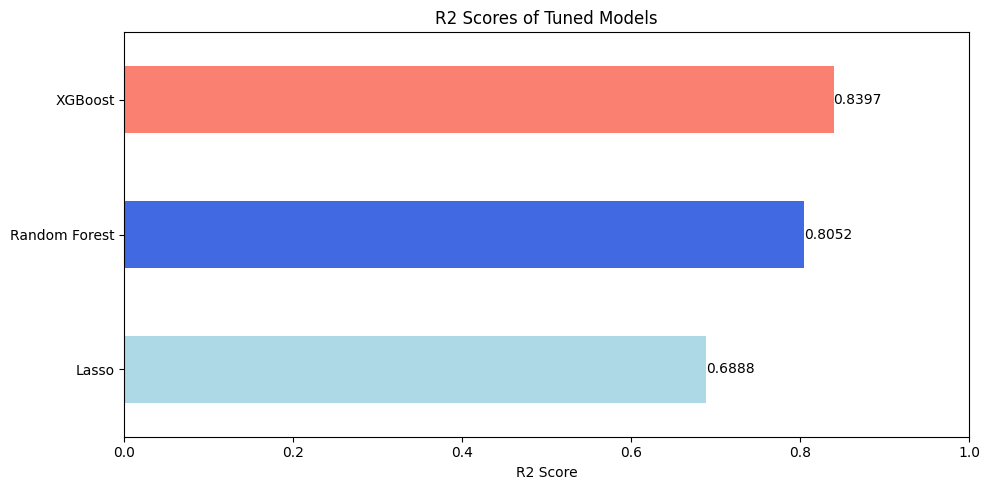

In [58]:
models = ['Lasso', 'Random Forest', 'XGBoost']
r2_scores = [tuned_lasso_r2, tuned_rf_r2, tuned_xgb_r2]

r2_series = pd.Series(r2_scores, index=models)

fig, ax = plt.subplots(figsize=(10, 5))
r2_series.plot(kind='barh', color=[ 'lightblue', 'royalblue', 'salmon'], ax=ax)
plt.title('R2 Scores of Tuned Models')
plt.xlabel('R2 Score')
plt.xlim(0, 1)
plt.tight_layout()

for index, value in enumerate(r2_series):
    ax.text(value, index, f'{value:.4f}', va='center')

plt.show()